## 数据分析与可视化


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/美赛/2025_MCM-ICM_Problems/2025_Problem_C_Data')

In [4]:
athletes = pd.read_csv('summerOly_athletes.csv')
hosts = pd.read_csv('summerOly_hosts.csv')
medal_counts = pd.read_csv('summerOly_medal_counts.csv')
programs = pd.read_csv('summerOly_programs.csv')

In [5]:
medal_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    1435 non-null   int64 
 1   NOC     1435 non-null   object
 2   Gold    1435 non-null   int64 
 3   Silver  1435 non-null   int64 
 4   Bronze  1435 non-null   int64 
 5   Total   1435 non-null   int64 
 6   Year    1435 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.6+ KB


In [8]:
medal_counts['NOC'] = medal_counts['NOC'].str.strip()
print(len(medal_counts['NOC'].unique()))
print(medal_counts['NOC'].unique())

164
['USA' 'GRE' 'GER' 'FRA' 'GBR' 'HUN' 'AUT' 'AUS' 'DEN' 'SUI' 'Mixed team'
 'BEL' 'ITA' 'CUB' 'CAN' 'ESP' 'LUX' 'NOR' 'NED' 'IND' 'Bohemia' 'SWE'
 'Australasia' 'Russian Empire' 'FIN' 'RSA' 'EST' 'BRA' 'JPN'
 'Czechoslovakia' 'NZL' 'Yugoslavia' 'ARG' 'URU' 'POL' 'HAI' 'POR' 'ROU'
 'EGY' 'IRL' 'CHI' 'PHI' 'MEX' 'LAT' 'TUR' 'JAM' 'PER' 'Ceylon' 'TTO'
 'PAN' 'KOR' 'IRI' 'PUR' 'Soviet Union' 'LBN' 'BUL' 'VEN'
 'United Team of Germany' 'ISL' 'PAK' 'BAH' 'ETH' 'Formosa' 'GHA' 'MAR'
 'SGP' 'British West Indies' 'IRQ' 'TUN' 'KEN' 'NGR' 'East Germany'
 'West Germany' 'MGL' 'UGA' 'CMR' 'Taiwan' 'PRK' 'COL' 'NIG' 'BER' 'THA'
 'ZIM' 'TAN' 'GUY' 'CHN' 'CIV' 'SYR' 'ALG' 'TPE' 'DOM' 'ZAM' 'SUR' 'CRC'
 'INA' 'Netherlands Antilles' 'SEN' 'ISV' 'DJI' 'Unified Team' 'LTU' 'NAM'
 'CRO' 'Independent Olympic Participants' 'ISR' 'SLO' 'MAS' 'QAT' 'RUS'
 'UKR' 'CZE' 'KAZ' 'BLR' 'FR Yugoslavia' 'SVK' 'ARM' 'BDI' 'ECU' 'HKG'
 'MDA' 'UZB' 'AZE' 'TGA' 'GEO' 'MOZ' 'KSA' 'SRI' 'VIE' 'BAR' 'KUW' 'KGZ'
 'Macedonia

In [9]:
noc_dict = {
    "Afghanistan": "AFG",
    "Albania": "ALB",
    "Algeria": "ALG",
    "Andorra": "AND",
    "Angola": "ANG",
    "Antigua and Barbuda": "ANT",
    "Argentina": "ARG",
    "Armenia": "ARM",
    "Aruba": "ARU",
    "American Samoa": "ASA",
    "Australia": "AUS",
    "Austria": "AUT",
    "Azerbaijan": "AZE",
    "Bahamas": "BAH",
    "Bangladesh": "BAN",
    "Barbados": "BAR",
    "Burundi": "BDI",
    "Belgium": "BEL",
    "Benin": "BEN",
    "Bermuda": "BER",
    "Bhutan": "BHU",
    "Bosnia and Herzegovina": "BIH",
    "Belize": "BIZ",
    "Belarus": "BLR",
    "Bolivia": "BOL",
    "Botswana": "BOT",
    "Brazil": "BRA",
    "Bahrain": "BRN",
    "Brunei": "BRU",
    "Bulgaria": "BUL",
    "Burkina Faso": "BUR",
    "Central African Republic": "CAF",
    "Cambodia": "CAM",
    "Canada": "CAN",
    "Cayman Islands": "CAY",
    "Republic of the Congo": "CGO",
    "Chad": "CHA",
    "Chile": "CHI",
    "China": "CHN",
    "Ivory Coast": "CIV",
    "Cameroon": "CMR",
    "Democratic Republic of the Congo": "COD",
    "Cook Islands": "COK",
    "Colombia": "COL",
    "Comoros": "COM",
    "Cape Verde": "CPV",
    "Costa Rica": "CRC",
    "Croatia": "CRO",
    "Cuba": "CUB",
    "Cyprus": "CYP",
    "Czech Republic": "CZE",
    "Denmark": "DEN",
    "Djibouti": "DJI",
    "Dominica": "DMA",
    "Dominican Republic": "DOM",
    "Ecuador": "ECU",
    "Egypt": "EGY",
    "Eritrea": "ERI",
    "El Salvador": "ESA",
    "Spain": "ESP",
    "Estonia": "EST",
    "Ethiopia": "ETH",
    "Fiji": "FIJ",
    "Finland": "FIN",
    "France": "FRA",
    "Federated States of Micronesia": "FSM",
    "Gabon": "GAB",
    "The Gambia": "GAM",
    "Great Britain": "GBR",
    "Guinea-Bissau": "GBS",
    "Georgia": "GEO",
    "Equatorial Guinea": "GEQ",
    "Germany": "GER",
    "Ghana": "GHA",
    "Greece": "GRE",
    "Grenada": "GRN",
    "Guatemala": "GUA",
    "Guinea": "GUI",
    "Guam": "GUM",
    "Guyana": "GUY",
    "Haiti": "HAI",
    "Hong Kong": "HKG",
    "Honduras": "HON",
    "Hungary": "HUN",
    "Indonesia": "INA",
    "India": "IND",
    "Iran": "IRI",
    "Ireland": "IRL",
    "Iraq": "IRQ",
    "Iceland": "ISL",
    "Israel": "ISR",
    "Virgin Islands": "ISV",
    "Italy": "ITA",
    "British Virgin Islands": "IVB",
    "Jamaica": "JAM",
    "Jordan": "JOR",
    "Japan": "JPN",
    "Kazakhstan": "KAZ",
    "Kenya": "KEN",
    "Kyrgyzstan": "KGZ",
    "Kiribati": "KIR",
    "South Korea": "KOR",
    "Kosovo": "KOS",
    "Saudi Arabia": "KSA",
    "Kuwait": "KUW",
    "Laos": "LAO",
    "Latvia": "LAT",
    "Libya": "LBA",
    "Lebanon": "LBN",
    "Liberia": "LBR",
    "Saint Lucia": "LCA",
    "Lesotho": "LES",
    "Liechtenstein": "LIE",
    "Lithuania": "LTU",
    "Luxembourg": "LUX",
    "Madagascar": "MAD",
    "Morocco": "MAR",
    "Malaysia": "MAS",
    "Malawi": "MAW",
    "Moldova": "MDA",
    "Maldives": "MDV",
    "Mexico": "MEX",
    "Mongolia": "MGL",
    "Marshall Islands": "MHL",
    "North Macedonia": "MKD",
    "Mali": "MLI",
    "Malta": "MLT",
    "Montenegro": "MNE",
    "Monaco": "MON",
    "Mozambique": "MOZ",
    "Mauritius": "MRI",
    "Mauritania": "MTN",
    "Myanmar": "MYA",
    "Namibia": "NAM",
    "Nicaragua": "NCA",
    "Netherlands": "NED",
    "Nepal": "NEP",
    "Nigeria": "NGR",
    "Niger": "NIG",
    "Norway": "NOR",
    "Nauru": "NRU",
    "New Zealand": "NZL",
    "Oman": "OMA",
    "Pakistan": "PAK",
    "Panama": "PAN",
    "Paraguay": "PAR",
    "Peru": "PER",
    "Philippines": "PHI",
    "Palestine": "PLE",
    "Palau": "PLW",
    "Papua New Guinea": "PNG",
    "Poland": "POL",
    "Portugal": "POR",
    "North Korea": "PRK",
    "Puerto Rico": "PUR",
    "Qatar": "QAT",
    "Romania": "ROU",
    "South Africa": "RSA",
    "Russia": "RUS",
    "Rwanda": "RWA",
    "Samoa": "SAM",
    "Senegal": "SEN",
    "Seychelles": "SEY",
    "Singapore": "SGP",
    "Saint Kitts and Nevis": "SKN",
    "Sierra Leone": "SLE",
    "Slovenia": "SLO",
    "San Marino": "SMR",
    "Solomon Islands": "SOL",
    "Somalia": "SOM",
    "Serbia": "SRB",
    "Sri Lanka": "SRI",
    "South Sudan": "SSD",
    "São Tomé and Príncipe": "STP",
    "Sudan": "SUD",
    "Switzerland": "SUI",
    "Suriname": "SUR",
    "Slovakia": "SVK",
    "Sweden": "SWE",
    "Eswatini": "SWZ",
    "Syria": "SYR",
    "Tanzania": "TAN",
    "Tonga": "TGA",
    "Thailand": "THA",
    "Tajikistan": "TJK",
    "Turkmenistan": "TKM",
    "Timor-Leste": "TLS",
    "Togo": "TOG",
    "Chinese Taipei": "TPE",
    "Trinidad and Tobago": "TTO",
    "Tunisia": "TUN",
    "Turkey": "TUR",
    "Tuvalu": "TUV",
    "United Arab Emirates": "UAE",
    "Uganda": "UGA",
    "Ukraine": "UKR",
    "Uruguay": "URU",
    "United States": "USA",
    "Uzbekistan": "UZB",
    "Vanuatu": "VAN",
    "Venezuela": "VEN",
    "Vietnam": "VIE",
    "Saint Vincent and the Grenadines": "VIN",
    "Yemen": "YEM",
    "Zambia": "ZAM",
    "Zimbabwe": "ZIM"
}
medal_counts['NOC'] = medal_counts['NOC'].map(noc_dict).fillna(medal_counts['NOC'])
medal_counts.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,USA,11,7,2,20,1896
1,2,GRE,10,18,19,47,1896
2,3,GER,6,5,2,13,1896
3,4,FRA,5,4,2,11,1896
4,5,GBR,2,3,2,7,1896


In [ ]:
print(len(medal_counts['NOC'].unique()))

164


In [ ]:
total_medal_counts = medal_counts[['NOC', 'Year', 'Total']]
total_medal_counts.head()

,NOC,Year,Total
0,USA,1896,20
1,GRE,1896,47
2,GER,1896,13
3,FRA,1896,11
4,GBR,1896,7


In [ ]:
print(len(total_medal_counts['NOC'].unique()))

164


In [ ]:
import pandas as pd

# 假设 total_medal_counts 是你的 DataFrame
# total_medal_counts = pd.DataFrame({...})

# 获取所有唯一的 Year 值
unique_years = total_medal_counts['Year'].unique()

# 创建一个空的 DataFrame 用于存储补全后的数据
complete_df = pd.DataFrame()
print(len(unique_years))
# 遍历每个 Year
for year in unique_years:
    # 筛选出当前 Year 的数据
    year_data = total_medal_counts[total_medal_counts['Year'] == year]

    # 获取当前 Year 中已有的 NOC
    existing_nocs = year_data['NOC'].unique()
    print(len(existing_nocs))
    # 遍历 noc_dict 中的 NOC
    for country, noc in noc_dict.items():
        if noc not in existing_nocs:
            # 如果 NOC 不存在，则补全数据
            new_row = {
                'NOC': noc,
                'Total': 0,
                'Year': year
            }
            # 将新行添加到当前 Year 的数据中
            year_data = pd.concat([year_data, pd.DataFrame([new_row])], ignore_index=True)

    # 将补全后的 Year 数据添加到 complete_df 中
    complete_df = pd.concat([complete_df, year_data], ignore_index=True)

# 按 Year 和 NOC 排序
data = complete_df.sort_values(by=['Year', 'NOC']).reset_index(drop=True)

# 输出前几行数据
print(data.head())

30
11
21
13
19
18
22
27
33
28
32
37
43
38
44
41
44
48
41
36
47
52
64
79
80
74
87
86
86
93
91
   NOC  Year  Total
0  AFG  1896      0
1  ALB  1896      0
2  ALG  1896      0
3  AND  1896      0
4  ANG  1896      0


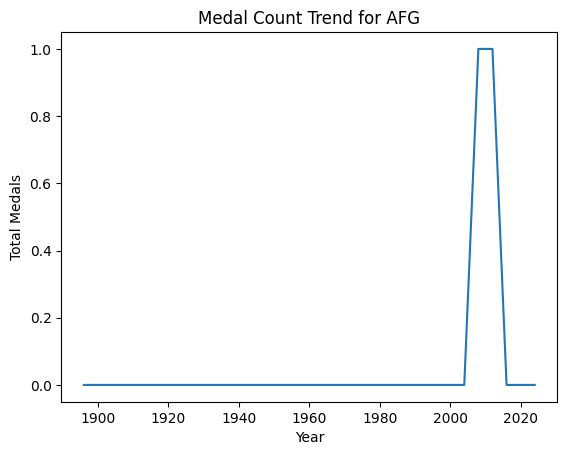

In [ ]:
# 为每个国家选择数据进行预测
country = 'AFG'

# 筛选出目标国家的数据
country_data = data[data['NOC'] == country]

# 按年份排序，并使用 Total 奖牌数进行时间序列预测
country_data = country_data[['Year', 'Total']]
country_data.set_index('Year', inplace=True)

# 绘制数据趋势图
plt.plot(country_data)
plt.title(f'Medal Count Trend for {country}')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
print(len(data['NOC'].unique()))

230


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 假设 data 是你的 DataFrame
# data = pd.DataFrame({...})

# 创建一个空列表用于存储预测结果
results = []

# 遍历每个 NOC
for country in noc_dict.values():

    # 筛选出当前 NOC 的数据
    country_data = data[data['NOC'] == country]
    country_data = country_data[['Year', 'Total']]
    country_data.set_index('Year', inplace=True)

    # 准备特征和目标变量
    X = country_data.index.values.reshape(-1, 1)  # 年份作为特征
    y = country_data['Total'].values  # 总奖牌数作为目标变量

    # 标准化特征
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.08, random_state=42)

    # 创建并训练随机森林回归模型
    rf_model = RandomForestRegressor(n_estimators=64, random_state=42)
    rf_model.fit(X_train, y_train)

    # 预测 2028 年的奖牌数
    year_to_predict = np.array([[2028]])
    year_to_predict_scaled = scaler.transform(year_to_predict)
    predicted_medals = rf_model.predict(year_to_predict_scaled)

    # 将结果添加到列表中
    results.append({
        'NOC': country,
        'Total': predicted_medals[0],
        'Year': 2028
    })

# 将结果列表转换为 DataFrame
results_df = pd.DataFrame(results)

# 保存为 CSV 文件
results_df.to_csv('predicted_medals_2028.csv', index=False)

print("预测结果已保存到 predicted_medals_2028.csv")

Processing AFG...
Processing ALB...
Processing ALG...
Processing AND...
Processing ANG...
Processing ANT...
Processing ARG...
Processing ARM...
Processing ARU...
Processing ASA...
Processing AUS...
Processing AUT...
Processing AZE...
Processing BAH...
Processing BAN...
Processing BAR...
Processing BDI...
Processing BEL...
Processing BEN...
Processing BER...
Processing BHU...
Processing BIH...
Processing BIZ...
Processing BLR...
Processing BOL...
Processing BOT...
Processing BRA...
Processing BRN...
Processing BRU...
Processing BUL...
Processing BUR...
Processing CAF...
Processing CAM...
Processing CAN...
Processing CAY...
Processing CGO...
Processing CHA...
Processing CHI...
Processing CHN...
Processing CIV...
Processing CMR...
Processing COD...
Processing COK...
Processing COL...
Processing COM...
Processing CPV...
Processing CRC...
Processing CRO...
Processing CUB...
Processing CYP...
Processing CZE...
Processing DEN...
Processing DJI...
Processing DMA...
Processing DOM...
Processing

In [ ]:
gold_medal_counts = medal_counts[['NOC', 'Year', 'Gold']]
gold_medal_counts.head()

,NOC,Year,Gold
0,USA,1896,11
1,GRE,1896,10
2,GER,1896,6
3,FRA,1896,5
4,GBR,1896,2


In [ ]:
import pandas as pd

unique_years = total_medal_counts['Year'].unique()

complete_df = pd.DataFrame()
print(len(unique_years))
# 遍历每个 Year
for year in unique_years:
    # 筛选出当前 Year 的数据
    year_data = gold_medal_counts[gold_medal_counts['Year'] == year]

    # 获取当前 Year 中已有的 NOC
    existing_nocs = year_data['NOC'].unique()
    # 遍历 noc_dict 中的 NOC
    for country, noc in noc_dict.items():
        if noc not in existing_nocs:
            # 如果 NOC 不存在，则补全数据
            new_row = {
                'NOC': noc,
                'Gold': 0,
                'Year': year
            }
            # 将新行添加到当前 Year 的数据中
            year_data = pd.concat([year_data, pd.DataFrame([new_row])], ignore_index=True)

    # 将补全后的 Year 数据添加到 complete_df 中
    complete_df = pd.concat([complete_df, year_data], ignore_index=True)

# 按 Year 和 NOC 排序
gold_data = complete_df.sort_values(by=['Year', 'NOC']).reset_index(drop=True)

# 输出前几行数据
print(gold_data.head())

30
   NOC  Year  Gold
0  AFG  1896     0
1  ALB  1896     0
2  ALG  1896     0
3  AND  1896     0
4  ANG  1896     0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

results = []

# 遍历每个 NOC
for country in noc_dict.values():

    # 筛选出当前 NOC 的数据
    country_data = gold_data[gold_data['NOC'] == country]
    country_data = country_data[['Year', 'Gold']]
    country_data.set_index('Year', inplace=True)

    # 准备特征和目标变量
    X = country_data.index.values.reshape(-1, 1)  # 年份作为特征
    y = country_data['Gold'].values  # 总奖牌数作为目标变量

    # 标准化特征
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.08, random_state=42)

    # 创建并训练随机森林回归模型
    rf_model = RandomForestRegressor(n_estimators=64, random_state=42)
    rf_model.fit(X_train, y_train)

    # 预测 2028 年的奖牌数
    year_to_predict = np.array([[2028]])
    year_to_predict_scaled = scaler.transform(year_to_predict)
    predicted_medals = rf_model.predict(year_to_predict_scaled)

    # 将结果添加到列表中
    results.append({
        'NOC': country,
        'Gold': predicted_medals[0],
        'Year': 2028
    })

# 将结果列表转换为 DataFrame
results_df = pd.DataFrame(results)

# 保存为 CSV 文件
results_df.to_csv('predicted_gold_medals_2028.csv', index=False)

print("预测结果已保存到 predicted_gold_medals_2028.csv")

预测结果已保存到 predicted_gold_medals_2028.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler

# ====================================================
# 1. 数据预处理（补全所有年份的NOC数据）
# ====================================================
all_medal_counts = medal_counts[['NOC', 'Year', 'Gold', 'Silver', 'Bronze', 'Total']]
unique_years = all_medal_counts['Year'].unique()
complete_df = pd.DataFrame()

for year in unique_years:
    year_data = all_medal_counts[all_medal_counts['Year'] == year]
    existing_nocs = year_data['NOC'].unique()

    for country, noc in noc_dict.items():
        if noc not in existing_nocs:
            new_row = {
                'NOC': noc,
                'Gold': 0,
                'Silver': 0,
                'Bronze': 0,
                'Total': 0,
                'Year': year
            }
            year_data = pd.concat([year_data, pd.DataFrame([new_row])], ignore_index=True)

    complete_df = pd.concat([complete_df, year_data], ignore_index=True)

all_data = complete_df.sort_values(by=['Year', 'NOC']).reset_index(drop=True)

# ====================================================
# 2. 定义时间序列交叉验证和网格搜索
# ====================================================
def time_series_train_test_split(X, y, test_size=0.08):
    """自定义时间序列划分"""
    split_idx = int(len(X) * (1 - test_size))
    return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

# 参数网格
param_grid = {
    'estimator__n_estimators': [32, 64, 128, 256],
    'estimator__max_depth': [None, 4, 8]
}

# ====================================================
# 3. 训练模型并预测
# ====================================================
results = []

for country in noc_dict.values():
    print(f"Processing {country}...")

    # 筛选国家数据
    country_data = all_data[all_data['NOC'] == country]

    country_data = country_data[['Year', 'Gold', 'Silver', 'Bronze']]
    country_data.set_index('Year', inplace=True)

    # 准备特征和目标变量（只预测奖牌数，Total后续计算）
    X = country_data.index.values.reshape(-1, 1)
    y = country_data[['Gold', 'Silver', 'Bronze']].values

    # 标准化特征
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 时间序列划分
    X_train, X_test, y_train, y_test = time_series_train_test_split(X_scaled, y, test_size=0.08)

    # 模型构建与调优
    base_model = RandomForestRegressor(random_state=42)
    model = MultiOutputRegressor(base_model)

    # 网格搜索
    tscv = TimeSeriesSplit(n_splits=3)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_mean_squared_error'
    )
    grid_search.fit(X_train, y_train)

    # 最佳模型预测
    best_model = grid_search.best_estimator_
    year_to_predict = np.array([[2028]])
    year_to_predict_scaled = scaler.transform(year_to_predict)
    predicted_medals = best_model.predict(year_to_predict_scaled).flatten()

    # 确保奖牌数为非负整数并计算Total
    gold = max(0, int(round(predicted_medals[0])))
    silver = max(0, int(round(predicted_medals[1])))
    bronze = max(0, int(round(predicted_medals[2])))
    total = gold + silver + bronze

    results.append({
        'NOC': country,
        'Gold': gold,
        'Silver': silver,
        'Bronze': bronze,
        'Total': total,
        'Year': 2028
    })

# ====================================================
# 4. 结果排序与保存
# ====================================================
# 按金牌降序、Total降序排序
results_df = pd.DataFrame(results).sort_values(
    by=['Gold', 'Total'],
    ascending=[False, False]
).reset_index(drop=True)

# 保存结果
results_df.to_csv('predicted_all_medals_2028_ranked.csv', index=False)
print(results_df.head(10))

Processing AFG...
Processing ALB...
Processing ALG...
Processing AND...
Processing ANG...
Processing ANT...
Processing ARG...
Processing ARM...
Processing ARU...
Processing ASA...
Processing AUS...
Processing AUT...
Processing AZE...
Processing BAH...
Processing BAN...
Processing BAR...
Processing BDI...
Processing BEL...
Processing BEN...
Processing BER...
Processing BHU...
Processing BIH...
Processing BIZ...
Processing BLR...
Processing BOL...
Processing BOT...
Processing BRA...
Processing BRN...
Processing BRU...
Processing BUL...
Processing BUR...
Processing CAF...
Processing CAM...
Processing CAN...
Processing CAY...
Processing CGO...
Processing CHA...
Processing CHI...
Processing CHN...
Processing CIV...
Processing CMR...
Processing COD...
Processing COK...
Processing COL...
Processing COM...
Processing CPV...
Processing CRC...
Processing CRO...
Processing CUB...
Processing CYP...
Processing CZE...
Processing DEN...
Processing DJI...
Processing DMA...
Processing DOM...
Processing

## 预测未获得过奖牌的国家下届奥运会获得奖牌的概率

In [10]:
import pandas as pd

unique_years = medal_counts['Year'].unique()

have_got_country = set()

# 遍历每个 Year
for year in unique_years:
    # 筛选出当前 Year 的数据
    year_data = medal_counts[medal_counts['Year'] == year]

    existing_nocs = year_data['NOC'].unique()

    for country, noc in noc_dict.items():
        if noc in existing_nocs:
            have_got_country.add(noc)

have_not_got_country = set(noc_dict.values()) - have_got_country

print(len(have_not_got_country))


66


In [11]:
have_not_got_country

{'AND',
 'ANG',
 'ANT',
 'ARU',
 'ASA',
 'BAN',
 'BEN',
 'BHU',
 'BIH',
 'BIZ',
 'BOL',
 'BRU',
 'CAF',
 'CAM',
 'CAY',
 'CGO',
 'CHA',
 'COD',
 'COK',
 'COM',
 'CPV',
 'ESA',
 'FSM',
 'GAM',
 'GBS',
 'GEQ',
 'GUI',
 'GUM',
 'HON',
 'IVB',
 'KIR',
 'LAO',
 'LBA',
 'LBR',
 'LES',
 'LIE',
 'MAD',
 'MAW',
 'MDV',
 'MHL',
 'MLI',
 'MLT',
 'MON',
 'MTN',
 'MYA',
 'NCA',
 'NEP',
 'NRU',
 'OMA',
 'PLE',
 'PLW',
 'PNG',
 'RWA',
 'SEY',
 'SKN',
 'SLE',
 'SOL',
 'SOM',
 'SSD',
 'STP',
 'SWZ',
 'TLS',
 'TUV',
 'VAN',
 'VIN',
 'YEM'}

In [13]:
data_2024 = medal_counts[medal_counts['Year'] == 2024]
data_2028 = pd.read_csv('predicted_all_medals_2028_ranked.csv')
gold_increase = []
silver_increase = []
bronze_increase = []
total_increase = []
for country, noc in noc_dict.items():
    if noc in data_2024['NOC'].values:
        gold_count_2024 = data_2024[data_2024['NOC'] == noc]['Gold'].values[0]
        gold_count_2028 = data_2028[data_2028['NOC'] == noc]['Gold'].values[0]
        if gold_count_2028 > gold_count_2024:
            gold_increase.append(noc)

        silver_count_2024 = data_2024[data_2024['NOC'] == noc]['Silver'].values[0]
        silver_count_2028 = data_2028[data_2028['NOC'] == noc]['Silver'].values[0]
        if silver_count_2028 > silver_count_2024:
            silver_increase.append(noc)

        bronze_count_2024 = data_2024[data_2024['NOC'] == noc]['Bronze'].values[0]
        bronze_count_2028 = data_2028[data_2028['NOC'] == noc]['Bronze'].values[0]
        if bronze_count_2028 > bronze_count_2024:
            bronze_increase.append(noc)

        total_count_2024 = data_2024[data_2024['NOC'] == noc]['Total'].values[0]
        total_count_2028 = data_2028[data_2028['NOC'] == noc]['Total'].values[0]
        if total_count_2028 > total_count_2024:
            total_increase.append(noc)
    else:
        gold_count_2024 = 0
        gold_count_2028 = data_2028[data_2028['NOC'] == noc]['Gold'].values[0]
        if gold_count_2028 > gold_count_2024:
            gold_increase.append(noc)

        silver_count_2024 = 0
        silver_count_2028 = data_2028[data_2028['NOC'] == noc]['Silver'].values[0]
        if silver_count_2028 > silver_count_2024:
            silver_increase.append(noc)

        bronze_count_2024 = 0
        bronze_count_2028 = data_2028[data_2028['NOC'] == noc]['Bronze'].values[0]
        if bronze_count_2028 > bronze_count_2024:
            bronze_increase.append(noc)

        total_count_2024 = 0
        total_count_2028 = data_2028[data_2028['NOC'] == noc]['Total'].values[0]
        if total_count_2028 > total_count_2024:
            total_increase.append(noc)

In [14]:
print(f"total_increase: {len(total_increase)}")
print(f"gold_increase: {len(gold_increase)}")
print(f"silver_increase: {len(silver_increase)}")
print(f"bronze_increase: {len(bronze_increase)}")

total_increase: 36
gold_increase: 25
silver_increase: 31
bronze_increase: 33


In [15]:
athletes_from_no_medals = athletes[athletes['NOC'].isin(have_not_got_country)]
athletes_from_no_medals.head()


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
98,M'Bairo Abakar,M,Chad,CHA,1992,Barcelona,Judo,Judo Men's Half-Middleweight,No medal
141,Carlos Balladares,M,Nicaragua,NCA,2004,Athina,Athletics,Athletics Men's 100 metres,No medal
142,Carlos Abaunza,M,Nicaragua,NCA,1976,Montreal,Athletics,Athletics Men's High Jump,No medal
153,Gana Kimet,M,Chad,CHA,1972,Munich,Athletics,Athletics Men's 100 metres,No medal
298,Moustafa Naser,M,Libya,LBA,1996,Atlanta,Athletics,Athletics Men's 400 metres,No medal


In [19]:
print(len(athletes_from_no_medals['NOC']))
athletes_from_no_medals['NOC'].unique()

5142


array(['CHA', 'NCA', 'LBA', 'PLE', 'COM', 'BRU', 'MDV', 'CGO', 'MON',
       'BEN', 'SOM', 'MLI', 'ANG', 'BAN', 'ESA', 'HON', 'SEY', 'MTN',
       'SKN', 'VIN', 'LBR', 'NEP', 'PLW', 'ASA', 'RWA', 'MLT', 'GUI',
       'BIZ', 'SLE', 'PNG', 'YEM', 'OMA', 'VAN', 'IVB', 'CAF', 'MAD',
       'BIH', 'GUM', 'CAY', 'GBS', 'TLS', 'COD', 'LAO', 'CAM', 'SOL',
       'CPV', 'GEQ', 'BOL', 'ANT', 'AND', 'FSM', 'MYA', 'MAW', 'STP',
       'LIE', 'GAM', 'COK', 'SWZ', 'ARU', 'NRU', 'BHU', 'MHL', 'KIR',
       'TUV', 'SSD', 'LES'], dtype=object)

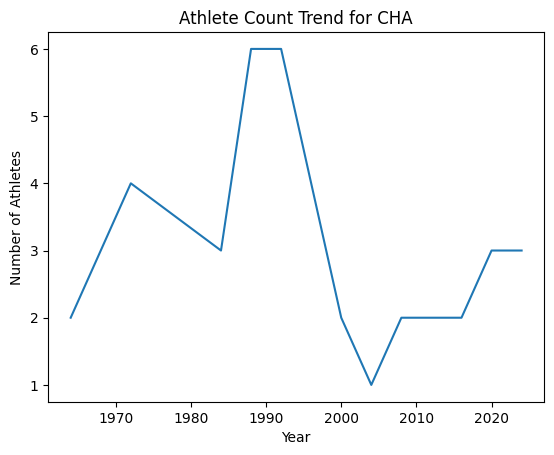

In [26]:
import matplotlib.pyplot as plt

# 假设 athletes_from_no_medals 是一个包含 NOC、Year 和 Name 列的 DataFrame
country = 'CHA'

# 筛选出对应国家的数据
country_data = athletes_from_no_medals[athletes_from_no_medals['NOC'] == country]

# 按年份分组并统计每年的参赛人数
yearly_athlete_count = country_data.groupby('Year')['Name'].nunique()

# 绘制图表
plt.plot(yearly_athlete_count.index, yearly_athlete_count.values)
plt.title(f'Athlete Count Trend for {country}')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()

### 未加入programs

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

athletes['HasMedal'] = athletes['Medal'] != 'No medal'

# 按国家-年份分组生成特征
country_year = athletes.groupby(['NOC', 'Year']).agg(
    AthleteCount=('Name', 'nunique'),
    SportCount=('Sport', 'nunique'),
    EventCount=('Event', 'nunique'),
    HasMedal=('HasMedal', 'any')
).reset_index()

# 生成标签：下一届是否获奖
country_year = country_year.sort_values(['NOC', 'Year'])
country_year['NextHasMedal'] = country_year.groupby('NOC')['HasMedal'].shift(-1)
country_year.dropna(subset=['NextHasMedal'], inplace=True)

In [35]:
def predict_2028_features(noc_data, target_col='AthleteCount'):
    """使用线性回归预测2028年特征值"""
    if len(noc_data) < 2:  # 数据不足时返回最近值
        return noc_data[target_col].iloc[-1]

    X = noc_data[['Year']].values
    y = noc_data[target_col].values
    model = LinearRegression()
    model.fit(X, y)
    return model.predict([[2028]])[0]

# 对每个国家预测2028年的特征
features_to_predict = ['AthleteCount', 'SportCount', 'EventCount']
future_features = []

for noc in country_year['NOC'].unique():
    noc_data = country_year[country_year['NOC'] == noc]
    preds = {'NOC': noc, 'Year': 2028}
    for feature in features_to_predict:
        preds[feature] = predict_2028_features(noc_data, feature)
    future_features.append(preds)

future_2028 = pd.DataFrame(future_features)

In [37]:
# 生成标签：下一届是否获奖
country_year = country_year.sort_values(['NOC', 'Year'])
country_year['NextHasMedal'] = country_year.groupby('NOC')['HasMedal'].shift(-1)

# 清洗数据：删除缺失标签的行
country_year = country_year.dropna(subset=['NextHasMedal'])

# 确保标签为整数 0/1
country_year['NextHasMedal'] = country_year['NextHasMedal'].astype(int)

# 再次检查标签类型和取值范围
print("标签值分布:\n", country_year['NextHasMedal'].value_counts())
print("标签数据类型:", country_year['NextHasMedal'].dtype)

# 划分训练集和测试集（按时间）
train = country_year[country_year['Year'] < 2010]
test = country_year[country_year['Year'] >= 2010]

# 确保特征列和标签列存在
features_to_predict = ['AthleteCount', 'SportCount', 'EventCount']
X_train = train[features_to_predict]
y_train = train['NextHasMedal']
X_test = test[features_to_predict]
y_test = test['NextHasMedal']

# 训练模型
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# 评估模型
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'分类模型AUC: {auc:.2f}')

标签值分布:
 NextHasMedal
0    1469
1    1298
Name: count, dtype: int64
标签数据类型: int64
分类模型AUC: 0.90


In [38]:
# 筛选这些国家的2028年预测特征
future_2028_target = future_2028[future_2028['NOC'].isin(have_not_got_country)]

# 预测概率
if not future_2028_target.empty:
    X_2028 = future_2028_target[features_to_predict]
    future_2028_target['PredictedProbability'] = clf.predict_proba(X_2028)[:, 1]
    future_2028_target[['NOC', 'PredictedProbability']].to_csv('2028_predictions.csv', index=False)
    print(future_2028_target[['NOC', 'PredictedProbability']])
else:
    print("目标国家无预测数据")

     NOC  PredictedProbability
4    AND              0.021729
5    ANG              0.210000
6    ANT              0.268169
10   ARU              0.053738
11   ASA              0.052593
..   ...                   ...
197  TLS              0.052593
203  TUV              0.243135
211  VAN              0.012543
214  VIN              0.594703
217  YEM              0.046334

[66 rows x 2 columns]


<ipython-input-38-030a332b9cfc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_2028_target['PredictedProbability'] = clf.predict_proba(X_2028)[:, 1]


In [32]:
columns_to_process = programs.columns[4:]

programs[columns_to_process] = programs[columns_to_process].apply(pd.to_numeric, errors='coerce')

row_means = programs[columns_to_process].mean(axis=1)

# Step 4: 用平均值替换 NaN
for column in columns_to_process:
    programs[column] = programs[column].fillna(programs.index.map(row_means))


### 使用programs和athelets数据预测

In [41]:
import pandas as pd
import numpy as np

# 读取并清理运动项目数据
df_programs = pd.read_csv('summerOly_programs.csv', encoding='utf-8', na_values=['�', '?', '-', ' '])
df_programs = df_programs.iloc[:-5]  # 移除汇总行

# 提取年份列（1896-2024）
year_columns = [str(year) for year in range(1896, 2025, 4) if year != 1906 and year != 1916 and year != 1940 and year != 1944]
df_programs[year_columns] = df_programs[year_columns].apply(pd.to_numeric, errors='coerce')

# 转换宽表为长表
df_long = df_programs.melt(
    id_vars=['Sport', 'Discipline', 'Code', 'Sports Governing Body'],
    value_vars=year_columns,
    var_name='Year',
    value_name='EventCount'
)
df_long['Year'] = df_long['Year'].astype(int)

In [42]:
# 读取并处理运动员数据
df_athletes = pd.read_csv('summerOly_athletes.csv')
df_athletes['HasMedal'] = df_athletes['Medal'] != 'No medal'

# 按国家-年份聚合特征
country_year = df_athletes.groupby(['NOC', 'Year']).agg(
    AthleteCount=('Name', 'nunique'),
    SportCount=('Sport', 'nunique'),
    EventCount=('Event', 'nunique'),
    HasMedal=('HasMedal', 'any')
).reset_index()

# 生成标签：下一届是否获奖
country_year = country_year.sort_values(['NOC', 'Year'])
country_year['NextHasMedal'] = country_year.groupby('NOC')['HasMedal'].shift(-1)
country_year = country_year.dropna(subset=['NextHasMedal'])
country_year['NextHasMedal'] = country_year['NextHasMedal'].astype(int)

In [43]:
from sklearn.linear_model import LinearRegression

# 预测每个运动项目2028年的事件数
predicted_events = []
for sport in df_long['Sport'].unique():
    sport_data = df_long[df_long['Sport'] == sport].dropna()
    if len(sport_data) < 2:
        pred = sport_data['EventCount'].iloc[0] if len(sport_data) > 0 else 0
    else:
        X = sport_data[['Year']]
        y = sport_data['EventCount']
        model = LinearRegression()
        model.fit(X, y)
        pred = model.predict([[2028]])[0]
    predicted_events.append({'Sport': sport, 'PredictedEvent_2028': max(0, pred)})

df_pred_2028 = pd.DataFrame(predicted_events)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

In [44]:
# 获取每个国家历史参与的运动项目
noc_sports = df_athletes.groupby(['NOC', 'Sport']).size().reset_index(name='Count')

# 合并预测事件数
noc_sports_pred = pd.merge(noc_sports, df_pred_2028, on='Sport', how='left')
noc_features = noc_sports_pred.groupby('NOC')['PredictedEvent_2028'].sum().reset_index()

In [45]:
# 合并历史特征和预测事件数
df_final = pd.merge(
    country_year,
    noc_features,
    on='NOC',
    how='left'
)
df_final['PredictedEvent_2028'] = df_final['PredictedEvent_2028'].fillna(0)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 划分训练集和测试集
train = df_final[df_final['Year'] < 2016]
test = df_final[df_final['Year'] >= 2016]

# 特征列
features = ['AthleteCount', 'SportCount', 'EventCount', 'PredictedEvent_2028']

# 训练模型
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(train[features], train['NextHasMedal'])

# 评估模型
y_pred_proba = model.predict_proba(test[features])[:, 1]
auc = roc_auc_score(test['NextHasMedal'], y_pred_proba)
print(f'模型AUC: {auc:.3f}')

模型AUC: 0.916


In [47]:
# 获取这些国家的最新数据
latest_data = df_final[df_final['NOC'].isin(have_not_got_country)]
latest_data = latest_data.groupby('NOC').last().reset_index()

# 预测概率
latest_data['Probability_2028'] = model.predict_proba(latest_data[features])[:, 1]
result = latest_data[['NOC', 'Probability_2028']].sort_values('Probability_2028', ascending=False)
result.to_csv('never_win_predictions_2028.csv', index=False)